In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn import datasets, neighbors, linear_model, preprocessing
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.decomposition import PCA


In [3]:
data = pd.read_csv("train.csv")
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [13]:
data.shape[1]

59

In [17]:
cols = data.columns
bin_cols = []
cat_cols = []
cont_ord = []
for i in range(0,data.shape[1]):
    if "bin" in cols[i]:
        bin_cols.append(cols[i])
    elif "cat" in cols[i]:
        cat_cols.append(cols[i])
    else:
        cont_ord.append(cols[i])
print(len(bin_cols))
print(len(cat_cols))
print(len(cont_ord))

17
14
28


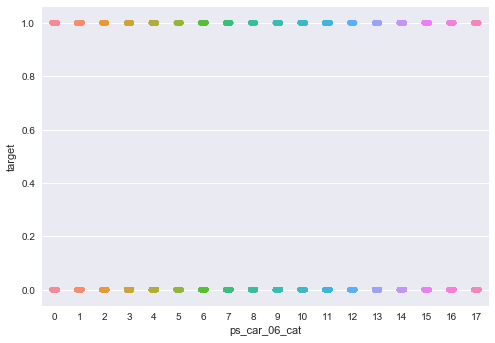

In [19]:
#for col in cat_cols:
sns.stripplot(x=col, y="target", data=data, jitter = True)
plt.show()

In [26]:
for col in cat_cols:
    print(str(col) + " : " + str(np.sort(data[col].unique())))

ps_ind_02_cat : [-1  1  2  3  4]
ps_ind_04_cat : [-1  0  1]
ps_ind_05_cat : [-1  0  1  2  3  4  5  6]
ps_car_01_cat : [-1  0  1  2  3  4  5  6  7  8  9 10 11]
ps_car_02_cat : [-1  0  1]
ps_car_03_cat : [-1  0  1]
ps_car_04_cat : [0 1 2 3 4 5 6 7 8 9]
ps_car_05_cat : [-1  0  1]
ps_car_06_cat : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
ps_car_07_cat : [-1  0  1]
ps_car_08_cat : [0 1]
ps_car_09_cat : [-1  0  1  2  3  4]
ps_car_10_cat : [0 1 2]
ps_car_11_cat : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104]


In [27]:
for col in bin_cols:
    print(str(col) + " : " + str(np.sort(data[col].unique())))

ps_ind_06_bin : [0 1]
ps_ind_07_bin : [0 1]
ps_ind_08_bin : [0 1]
ps_ind_09_bin : [0 1]
ps_ind_10_bin : [0 1]
ps_ind_11_bin : [0 1]
ps_ind_12_bin : [0 1]
ps_ind_13_bin : [0 1]
ps_ind_16_bin : [0 1]
ps_ind_17_bin : [0 1]
ps_ind_18_bin : [0 1]
ps_calc_15_bin : [0 1]
ps_calc_16_bin : [0 1]
ps_calc_17_bin : [0 1]
ps_calc_18_bin : [0 1]
ps_calc_19_bin : [0 1]
ps_calc_20_bin : [0 1]
